In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


In [10]:
# Pfad zum Ordner mit den Bildern
ordner_pfad_train = './dataset/train_images'
ordner_pfad_test = './dataset/test_images'


data = []

for ordner_name in os.listdir(ordner_pfad_train):
    documentcount = 0
    for datei in os.listdir(f"{ordner_pfad_train}/{ordner_name}"):
        documentcount += 1
        
    data.append({"ordner_name": ordner_name,
                 "ordner_typ": "train",
                 "anzahl_objekte": documentcount})
        
for ordner_name in os.listdir(ordner_pfad_test):
    documentcount = 0
    for datei in os.listdir(f"{ordner_pfad_test}/{ordner_name}"):
        documentcount += 1
        
    data.append({"ordner_name": ordner_name,
                 "ordner_typ": "train",
                 "anzahl_objekte": documentcount})

df = pd.DataFrame(data, columns=["ordner_name", "ordner_typ", "anzahl_objekte"])


In [11]:
# Gruppiere nach 'ordner_name' und summiere die 'anzahl_objekte'
grouped_df = df.groupby('ordner_name')['anzahl_objekte'].sum().reset_index()

# Finde die Datensätze mit den minimalen und maximalen Werten in 'anzahl_objekte'
min_objekte = grouped_df.loc[grouped_df['anzahl_objekte'].idxmin()]
max_objekte = grouped_df.loc[grouped_df['anzahl_objekte'].idxmax()]

print("\nDatensatz mit der minimalen Anzahl an Objekten:")
print(min_objekte)

print("\nDatensatz mit der maximalen Anzahl an Objekten:")
print(max_objekte)


Datensatz mit der minimalen Anzahl an Objekten:
ordner_name       Jackson_Pollock
anzahl_objekte                 24
Name: 25, dtype: object

Datensatz mit der maximalen Anzahl an Objekten:
ordner_name       Vincent_van_Gogh
anzahl_objekte                 877
Name: 48, dtype: object


In [12]:
grouped_df.sort_values(by="anzahl_objekte")

,ordner_name,anzahl_objekte
25,Jackson_Pollock,24
14,Eugene_Delacroix,31
17,Georges_Seurat,43
34,Paul_Cezanne,47
31,Michelangelo,49
6,Caravaggio,55
20,Gustave_Courbet,59
49,William_Turner,66
12,Edvard_Munch,67
22,Henri_Rousseau,70


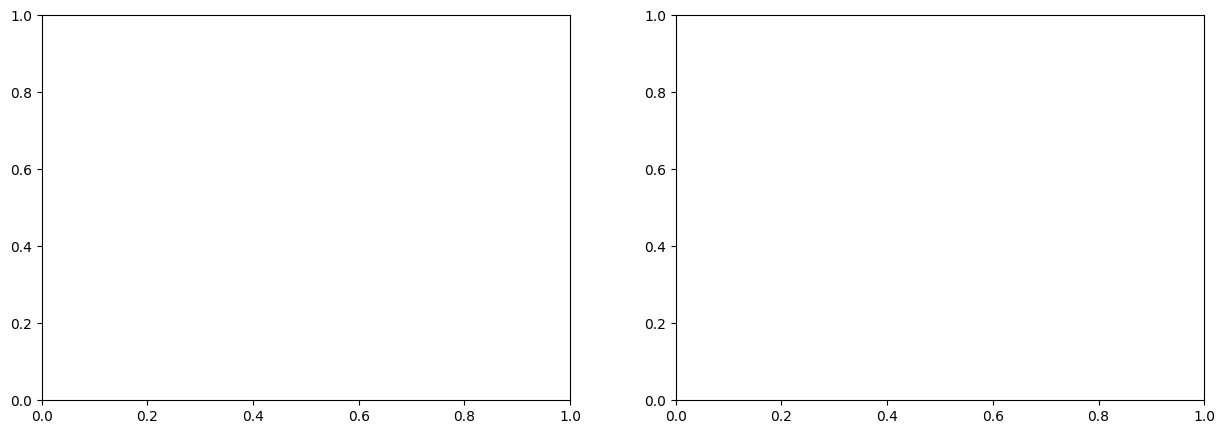

In [14]:
img_paths = ["./dataset/train_images/Albrecht_Duerer/Albrecht_duerer_1.jpg",
             "./dataset/train_images/Alfred_Sisley/Alfred_sisley_1.jpg"]

titles = {img_path: os.path.basename(img_path) for img_path in img_paths}

num_images = len(img_paths)

fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

if num_images == 1:
    axes = [axes]
    
    for ax, img_path in zip(axes, img_paths):
        image = Image.open(img_path)
        ax.imshow(image)
        if titles:
            ax.set_title(titles[img_path])
        ax.axis('off')

    plt.show()